In [1]:
# Import Dependencies
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectFromModel

## Promotion Dataset

Multiple attributes have been provided around Employee's past and current performance along with demographics.

Features:

- employee_id: Unique ID for employee
- department: Department of employee
- region: Region of employment (unordered)
- education: Education Level
- gender: Gender of Employee
- recruitment_channel: Channel of recruitment for employee
- no_ of_ trainings: no of other trainings completed in previous year on soft skills, technical skills etc.
- age: Age of Employee
- previous_ year_ rating: Employee Rating for the previous year
- length_ of_ service: Length of service in years
- awards_ won?: if awards won during previous year then 1 else 0
- avg_ training_ score: Average score in current training evaluations
- is_promoted: (Target) Recommended for promotion

In [2]:
# Read the csv file into a pandas DataFrame called `promotions_df`

### YOUR CODE HERE
promotions_df = pd.read_csv("/content/drive/MyDrive/Resourses/promotions.csv")
promotions_df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [3]:
# Create `X` and `y` datasets

### YOUR CODE HERE
X = promotions_df.drop(columns="is_promoted")
y = promotions_df["is_promoted"]
X.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73


In [4]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_promoted, dtype: int64

In [5]:
# Dummy encode the `X` data into numerical features

### YOUR CODE HERE
X = pd.get_dummies(X, prefix="Label")



In [6]:
# Divide the data into training and testing sets

### YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [7]:
# Create a StandardScaler() model and fit it to the training data

### YOUR CODE HERE
scale = StandardScaler().fit(X_train)

In [8]:
# Transform the training and testing data by using the scaler model

### YOUR CODE HERE
scaled_X_train = scale.transform(X_train)
scaled_X_test = scale.transform(X_test)

## Use Random Forest to predict promotions

In [9]:
# Fit a Random Forest Classifier model with 500 trees and print training and testing scores

### YOUR CODE HERE
classifier = RandomForestClassifier(random_state=10, n_estimators = 500).fit(scaled_X_train, y_train)
y_pred = classifier.predict(scaled_X_test)

print(classification_report(y_test, y_pred))
print("Training Score: {} ".format(classifier.score(scaled_X_train, y_train)))
print("Testing Score: {} ".format(classifier.score(scaled_X_test, y_test)))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     11070
           1       0.87      0.29      0.44      1095

    accuracy                           0.93     12165
   macro avg       0.90      0.64      0.70     12165
weighted avg       0.93      0.93      0.92     12165

Training Score: 0.9997533908754624 
Testing Score: 0.9325113029182079 


In [10]:
# Calculate feature importance from the fitted random forest model

### YOUR CODE HERE
feature_imp = classifier.feature_importances_
print(feature_imp)

[2.53378906e-02 1.53762988e-01 6.27935368e-02 1.30889654e-01
 3.03574234e-02 3.06044491e-01 1.03413206e-02 7.46427463e-03
 4.26628393e-03 2.71157809e-03 1.89126954e-02 1.06396615e-02
 5.04071259e-03 1.96698159e-02 1.03102136e-02 2.64654780e-03
 2.88709916e-03 2.99021464e-03 1.49699062e-03 6.41587199e-03
 3.18946387e-03 6.22410099e-03 4.23412127e-03 3.97930796e-03
 2.48226287e-04 2.58785993e-03 1.21205067e-02 2.65821971e-03
 1.56097574e-03 7.75872844e-03 5.00232299e-03 1.53380258e-03
 3.35026208e-03 5.39132843e-03 5.06579666e-03 4.08221557e-03
 2.68480727e-03 2.37657073e-03 3.16857501e-03 3.89569944e-03
 2.19087062e-03 8.99217652e-04 6.11718716e-04 5.54618401e-03
 1.40596995e-03 1.81997391e-03 8.61689305e-03 3.20242048e-03
 6.29586864e-04 7.00263713e-03 1.11143848e-03 7.01952435e-03
 1.23800009e-02 1.23812297e-02 1.73472459e-02 4.32276922e-03
 1.74201635e-02]


In [11]:
# Visualize the feature importance 

### YOUR CODE HERE
px.bar(x=X.columns, y=feature_imp,labels={"x":"Features","y":"Score Features"})

In [12]:
# Perofrm feature selection using sklearns SelectFromModel module

### YOUR CODE HERE
selec_model = SelectFromModel(classifier)
selec_model.fit(scaled_X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=500,
                                                 random_state=10))

In [13]:
# Use the `.transofrm()` function to transform the scaled `X_train` and `X_test` data 
# to return a new dataframe with only the features from the previous step

### YOUR CODE HERE
new_scaled_X_train = scale.transform(X_train)
new_scaled_X_test = scale.transform(X_test)

selFeatures = pd.DataFrame(new_scaled_X_train)
selFeatures.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56
0,-0.416618,0.320752,1.327688,1.110924,-0.153022,-0.874029,-0.322753,-0.217675,-0.213219,-0.135502,-0.525149,-0.399041,-0.137585,1.552556,-0.392651,-0.106724,-0.114098,-0.157556,-0.093009,-0.233245,-0.125287,-0.233897,-0.166462,-0.12641,-0.021588,-0.132108,-0.533336,-0.127191,-0.090118,-0.355512,6.547074,-0.096397,-0.123469,-0.204139,-0.173292,-0.154887,-0.135293,-0.082548,-0.112735,-0.187073,-0.127302,-0.074418,-0.070795,-0.185814,-0.118217,-0.111103,-0.316032,-0.110977,-0.08238,0.671678,-0.095085,-0.657666,-0.659291,0.659291,-1.119151,-0.144555,1.166778
1,-0.416618,-0.608357,-1.853586,-0.311985,6.535028,-0.044375,-0.322753,-0.217675,-0.213219,-0.135502,1.904222,-0.399041,-0.137585,-0.644099,-0.392651,-0.106724,-0.114098,-0.157556,-0.093009,-0.233245,-0.125287,-0.233897,-0.166462,-0.12641,-0.021588,-0.132108,-0.533336,-0.127191,-0.090118,-0.355512,-0.152740,-0.096397,-0.123469,-0.204139,-0.173292,-0.154887,-0.135293,-0.082548,-0.112735,-0.187073,-0.127302,-0.074418,-0.070795,-0.185814,-0.118217,-0.111103,3.164233,-0.110977,-0.08238,0.671678,-0.095085,-0.657666,-0.659291,0.659291,0.893534,-0.144555,-0.857061
2,2.884396,0.718941,-0.262949,0.162318,-0.153022,-0.949452,-0.322753,-0.217675,-0.213219,-0.135502,-0.525149,-0.399041,-0.137585,1.552556,-0.392651,-0.106724,-0.114098,-0.157556,-0.093009,-0.233245,-0.125287,-0.233897,-0.166462,-0.12641,-0.021588,-0.132108,-0.533336,-0.127191,-0.090118,2.812843,-0.152740,-0.096397,-0.123469,-0.204139,-0.173292,-0.154887,-0.135293,-0.082548,-0.112735,-0.187073,-0.127302,-0.074418,-0.070795,-0.185814,-0.118217,-0.111103,-0.316032,-0.110977,-0.08238,-1.488809,-0.095085,1.520528,-0.659291,0.659291,0.893534,-0.144555,-0.857061
3,2.884396,-0.608357,1.327688,0.162318,-0.153022,-0.270645,-0.322753,-0.217675,-0.213219,-0.135502,1.904222,-0.399041,-0.137585,-0.644099,-0.392651,-0.106724,-0.114098,-0.157556,-0.093009,-0.233245,-0.125287,-0.233897,-0.166462,-0.12641,-0.021588,-0.132108,1.874991,-0.127191,-0.090118,-0.355512,-0.152740,-0.096397,-0.123469,-0.204139,-0.173292,-0.154887,-0.135293,-0.082548,-0.112735,-0.187073,-0.127302,-0.074418,-0.070795,-0.185814,-0.118217,-0.111103,-0.316032,-0.110977,-0.08238,0.671678,-0.095085,-0.657666,1.516781,-1.516781,-1.119151,6.917761,-0.857061
4,1.233889,-0.475627,-1.058267,-0.311985,-0.153022,0.483586,-0.322753,-0.217675,-0.213219,-0.135502,-0.525149,2.506007,-0.137585,-0.644099,-0.392651,-0.106724,-0.114098,-0.157556,-0.093009,-0.233245,-0.125287,-0.233897,-0.166462,-0.12641,-0.021588,-0.132108,-0.533336,-0.127191,-0.090118,2.812843,-0.152740,-0.096397,-0.123469,-0.204139,-0.173292,-0.154887,-0.135293,-0.082548,-0.112735,-0.187073,-0.127302,-0.074418,-0.070795,-0.185814,-0.118217,-0.111103,-0.316032,-0.110977,-0.08238,0.671678,-0.095085,-0.657666,-0.659291,0.659291,0.893534,-0.144555,-0.857061


In [14]:
# Fit a model and print training and testing scores with 500 trees

### YOUR CODE HERE
classifier_1 = RandomForestClassifier(random_state=1, n_estimators=500).fit(selFeatures, y_train)
y_pred = classifier_1.predict(new_scaled_X_test)

print(classification_report(y_test, y_pred))
print(f'Training Score: {classifier_1.score(selFeatures, y_train)}')
print(f'Testing Score: {classifier_1.score(new_scaled_X_test, y_test)}')

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     11070
           1       0.86      0.29      0.44      1095

    accuracy                           0.93     12165
   macro avg       0.90      0.64      0.70     12165
weighted avg       0.93      0.93      0.92     12165

Training Score: 0.9997533908754624
Testing Score: 0.9321002877106453


## Use K Nearest Neighbors to predict promotions

In [15]:
# Fit a K Nearest Neighbors model and loop through different k values of 1 to 20 by 2
# to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.

### YOUR CODE HERE
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaled_X_train, y_train)
    train_score = knn.score(scaled_X_train, y_train)
    test_score = knn.score(scaled_X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    

k: 1, Train/Test Score: 1.000/0.873
k: 3, Train/Test Score: 0.934/0.907
k: 5, Train/Test Score: 0.924/0.913
k: 7, Train/Test Score: 0.922/0.913
k: 9, Train/Test Score: 0.920/0.914
k: 11, Train/Test Score: 0.919/0.913
k: 13, Train/Test Score: 0.918/0.913
k: 15, Train/Test Score: 0.918/0.912
k: 17, Train/Test Score: 0.918/0.912
k: 19, Train/Test Score: 0.917/0.913


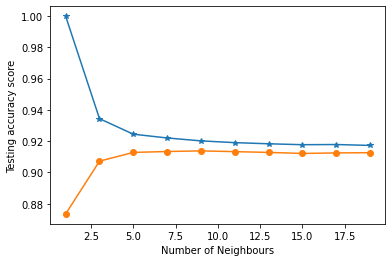

In [16]:
# Plot the results of the train and test scores from the previous loop   

### YOUR CODE HERE
plt.plot(range(1, 20, 2), train_scores, marker='*')
plt.plot(range(1, 20, 2), test_scores, marker="o")
plt.xlabel("Number of Neighbours")
plt.ylabel("Testing accuracy score")
plt.show()

In [17]:
# Select the `k` that provides the best accuracy where the classifier starts to stablize

### YOUR CODE HERE
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(scaled_X_train, y_train)
print('k=9 Test Acc: %.3f' % knn.score(scaled_X_test, y_test))

k=9 Test Acc: 0.914
